# Izhikevich Neuron Model

In [ ]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt

1) Parameters
* a = Time scale of recovery (0.002 – 0.07)
* b = Coupling of u and v (0.12 – 0.25)
* c = Reset value of membrane potential (-55 – -75)
* d = After spike, reset of recovery variable (2 – 12)

2) c and d affect the bursting behaviour

3) Change b to go from regular to phasic bursting

4) Reduce c, it'll spike more

5) Increasing a, b => Increase in frequency of spikes

6) Increasing |c|, |d| => Decrease in bursting

In [ ]:
# Defining the Izhikevich Neuron model
def izh(a, b, c, d, I_in, tmax, dt, title, i_ramp = False, i_pulse = False):
  # Defining required arrays
  t = np.arange(0, tmax, dt)
  u = np.zeros_like(t)
  v = np.zeros_like(t)
  u[0] = -14
  v[0] = -70
  spike_thresh = 35
  # Generate the input current array
  off_period = int(0.1*tmax/dt)
  on_period = int(tmax/dt) - 2*off_period
  I = np.concatenate((np.zeros(off_period), np.ones(on_period)*I_in, np.zeros(off_period)))
  if i_ramp:
    I = np.concatenate((np.zeros(off_period), np.linspace(0, 1, on_period)*I_in, np.zeros(off_period)))
  if i_pulse:
    pulse_on = int(off_period*0.1)
    pulse_off = int(tmax/dt) - off_period - pulse_on
    I = np.concatenate((np.zeros(off_period), np.ones(pulse_on)*I_in, np.zeros(pulse_off)))
  # Forward Euler method to solve the differential equations
  for i in range(len(t)-1):
    v[i+1] = v[i] + (0.04*v[i]**2 + 5*v[i] + 140 - u[i] + I[i])*dt
    u[i+1] = u[i] + (a*(b*v[i] - u[i]))*dt
    if v[i] >= spike_thresh:
      v[i] = spike_thresh
      v[i+1] = c
      u[i+1] = u[i] + d

  plt.figure(figsize=(17,4))
  plt.plot(t, v, label='Membrane Potential')
  plt.plot(t, I, label='Applied Current')
  plt.plot(t, u, label='Recovery variable')
  plt.xlabel("time (ms)")
  plt.ylabel("Voltage (mV) / Current (mA)")
  plt.legend(loc="upper right")
  plt.title(title)
  plt.show()

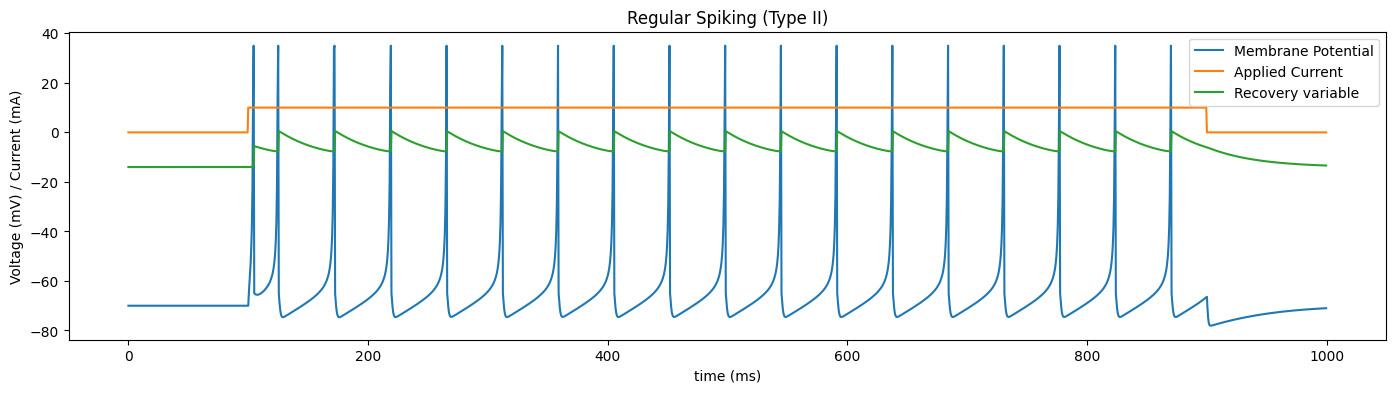

In [ ]:
# Regular Spiking (Type II)
a = 0.02
b = 0.2
c = -65
d = 8
I = 10
tmax = 1000
dt = 0.5
# Calling the function
izh(a, b, c, d, I, tmax, dt, "Regular Spiking (Type II)")

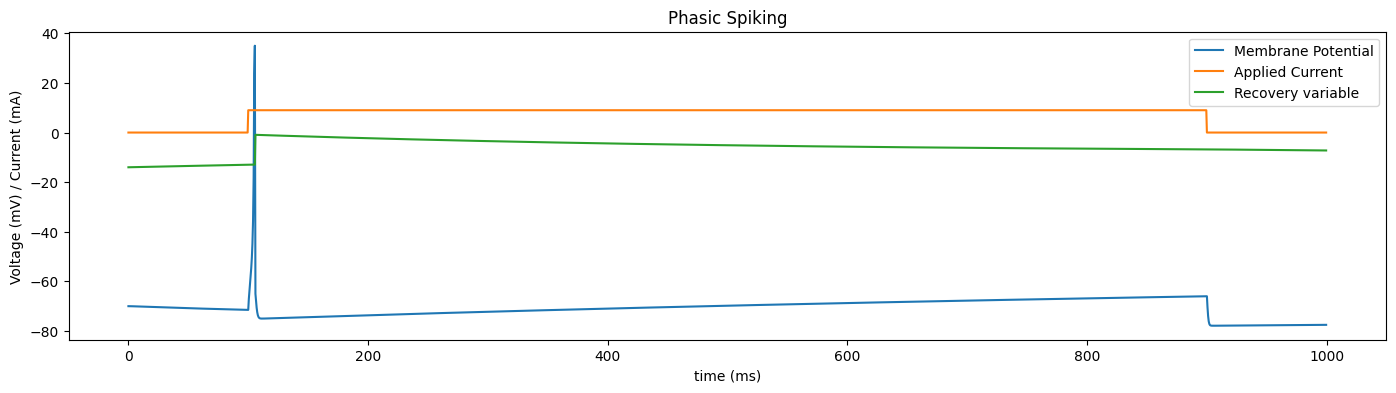

In [ ]:
# Phasic Spiking
a = 0.002
b = 0.12
c = -65
d = 12
I = 9
tmax = 1000
dt = 0.5
# Calling the function
izh(a, b, c, d, I, tmax, dt, "Phasic Spiking")

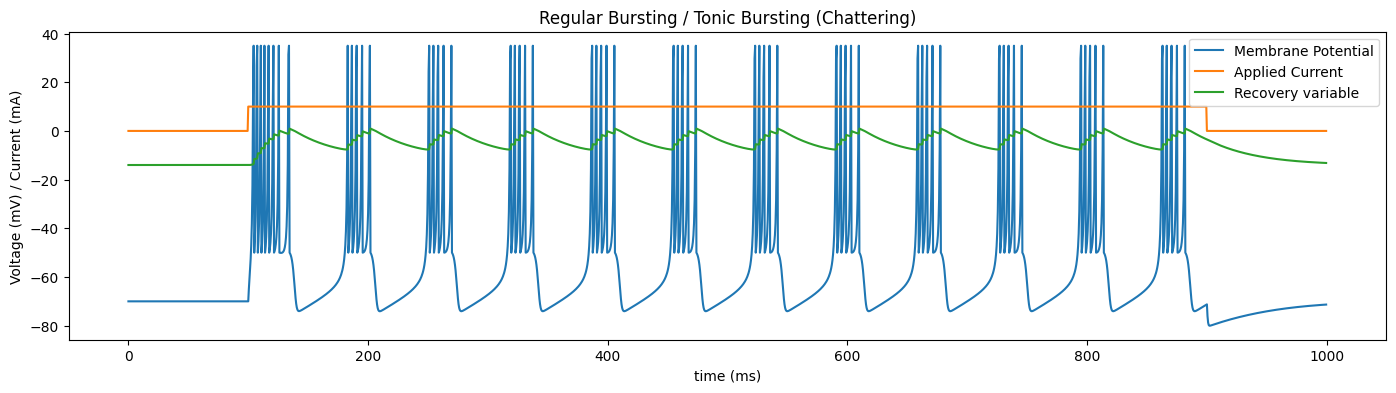

In [ ]:
# Regular Bursting / Tonic Bursting (Chattering)
a = 0.02
b = 0.2
c = -50
d = 2
I = 10
tmax = 1000
dt = 0.5
# Calling the function
izh(a, b, c, d, I, tmax, dt, "Regular Bursting / Tonic Bursting (Chattering)")

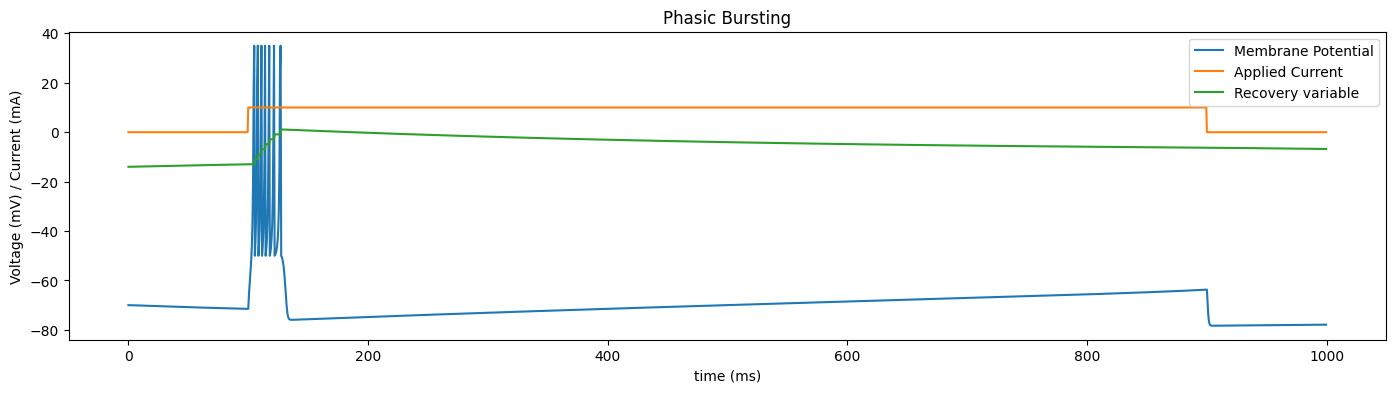

In [ ]:
# Phasic Bursting
a = 0.002
b = 0.12
c = -50
d = 2
I = 10
tmax = 1000
dt = 0.5
# Calling the function
izh(a, b, c, d, I, tmax, dt, "Phasic Bursting")

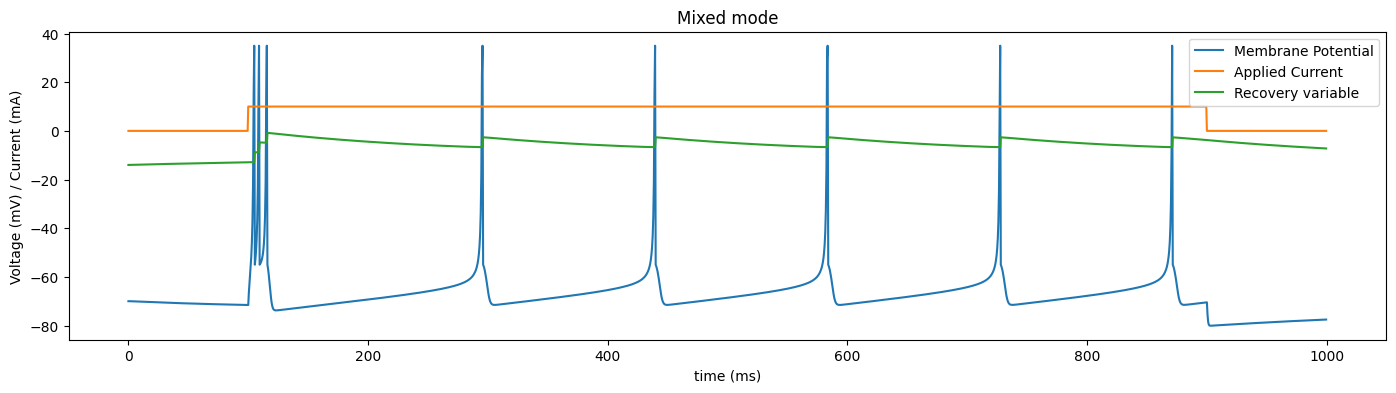

In [ ]:
# Mixed mode
a = 0.005
b = 0.16
c = -55
d = 4
I = 10
tmax = 1000
dt = 0.5
# Calling the function
izh(a, b, c, d, I, tmax, dt, "Mixed mode")

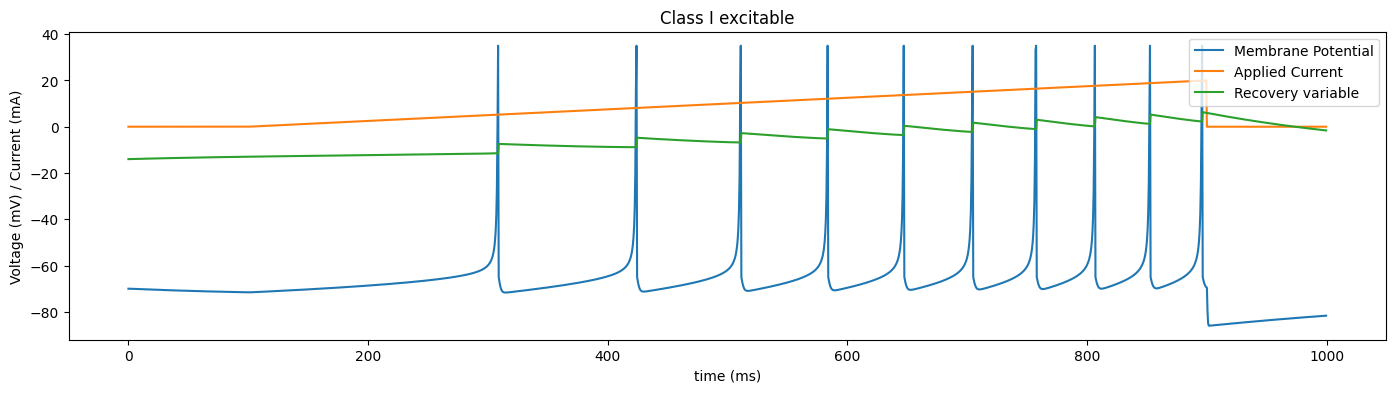

In [ ]:
# Class I excitable
a = 0.005
b = 0.16
c = -65
d = 4
I = 20
tmax = 1000
dt = 0.5
# Calling the function
izh(a, b, c, d, I, tmax, dt, "Class I excitable", i_ramp=True)

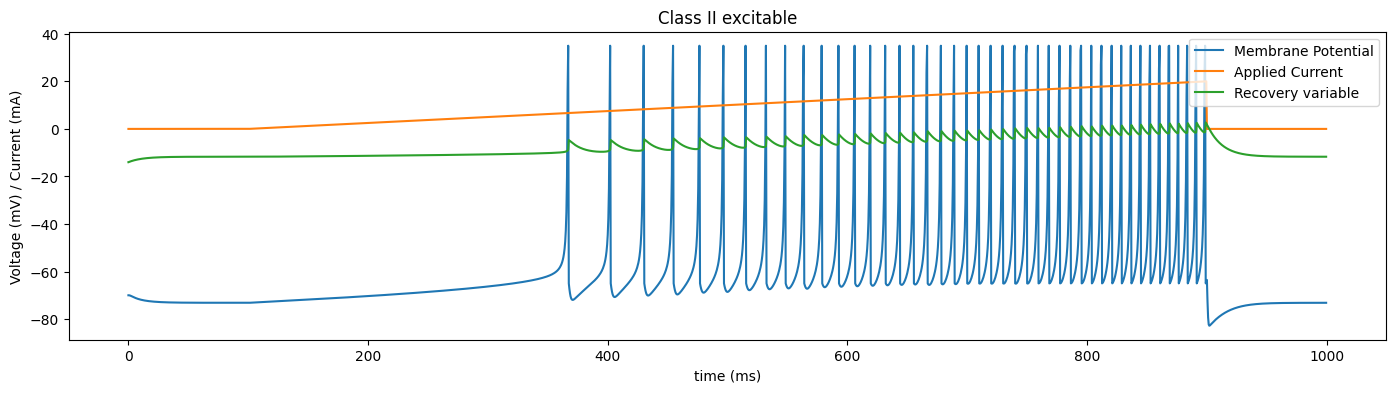

In [ ]:
# Class II excitable (a > 0.07)
a = 0.07
b = 0.16
c = -65
d = 4
I = 20
tmax = 1000
dt = 0.5
# Calling the function
izh(a, b, c, d, I, tmax, dt, "Class II excitable", i_ramp=True)

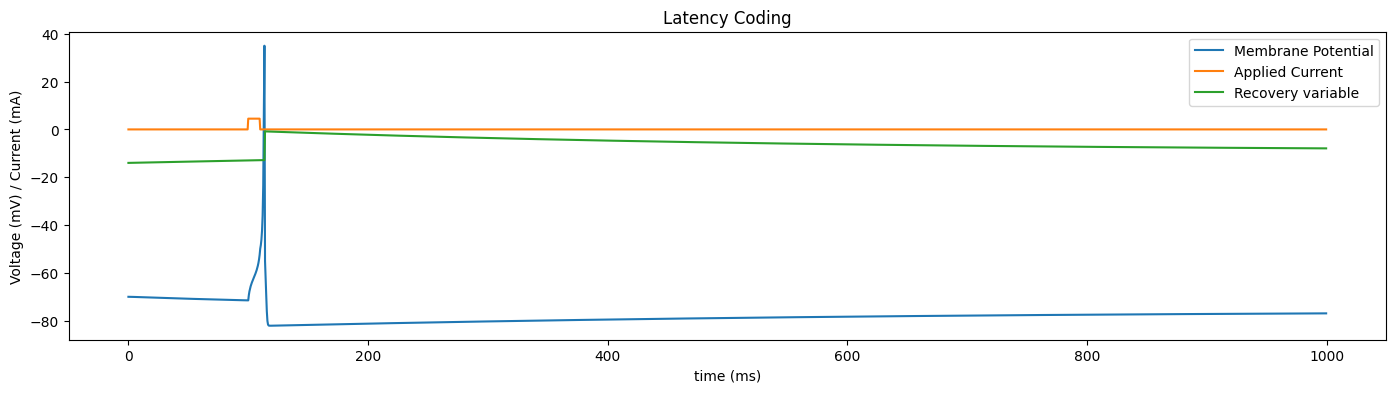

In [ ]:
# Latency Coding
a = 0.002
b = 0.12
c = -55
d = 12
I = 4.5
tmax = 1000
dt = 0.5
# Calling the function
izh(a, b, c, d, I, tmax, dt, "Latency Coding", i_pulse=True)